In [1]:
import pandas as pd;
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RULES_SCENARIO = ["rules per goal = 3.csv" , 
          "rules per goal = 4.csv" , 
          "rules per goal = 5.csv"]

GOALS_BELIEFS_SCENARIO = [ "goals=100 beliefs=500.csv" , 
          "goals=100 beliefs=1000.csv", 
          "goals=50 beliefs=1000.csv"]

DYNAMICS_SCENARIO = [ "dynamics = 0.csv",
         "dynamics = 0.1.csv" , 
          "dynamics = 0.2.csv"]

DEFAULT = 0 ; STORING = 1 ; FORGETTING = 2;

memoryStrategies = [ "DEFAULT" , "STORING_RETRIEVING"  , "FORGETTING"];
engines = ["SOAREngine" , "BDIEngine" , "BBGPEngine"];

SOAR = 0 ; BDI = 1 ; BBGP = 2;

relevanceModels = ["DefaultRelevanceModel" , 
                   "SOARIntegratedRelevanceModel",
                   "BDIIntegratedRelevanceModel" ,
                  "BBGPIntegratedRelevanceModel" ];

efficiencyProperties = ["memEfficiency" , "cpuEfficiency"];

MEM = 0 ; CPU = 1;

In [3]:
def select(memoryStrategy , engine, relevanceModel , data):
    
    return data.loc[(data['memoryStrategy'].str.contains(memoryStrategy)) 
                   & (data['relevanceModel'].str.contains(relevanceModel))
                     & (data['engine'].str.contains(engine))]

In [4]:
def describe(memoryStrategy , engine, relevanceModel , efficiencyProperty, data):
    return select(memoryStrategy , engine , relevanceModel , data)[efficiencyProperty].describe()[['mean' , 'std' , 'min' , '25%', '50%', '75%','max']];

def describeMem(memoryStrategy , engine, relevanceModel, data):
    return describe(memoryStrategy , engine, relevanceModel , efficiencyProperties[0], data);

def describeCpu(memoryStrategy , engine, relevanceModel , data):
    return describe(memoryStrategy , engine, relevanceModel , efficiencyProperties[1], data);


In [5]:
def describeMemPerEngine(engineIndex , data):
    default = describeMem(memoryStrategies[0] , engines[engineIndex] , relevanceModels[0] , data);
    defaultIntegrated = describeMem(memoryStrategies[0] , engines[engineIndex] , relevanceModels[engineIndex+1], data);
    storing = describeMem(memoryStrategies[1] , engines[engineIndex] , relevanceModels[0], data);
    storingIntegrated = describeMem(memoryStrategies[1] , engines[engineIndex] , relevanceModels[engineIndex+1], data);
    oblivion = describeMem(memoryStrategies[2] , engines[engineIndex] , relevanceModels[0], data);
    oblivionIntegrated = describeMem(memoryStrategies[2] , engines[engineIndex] , relevanceModels[engineIndex+1], data);
    return createDataFrame(default, defaultIntegrated,
                           storing, storingIntegrated,
                           oblivion, oblivionIntegrated);
    
def describeCpuPerEngine(engineIndex , data):
    default = describeCpu(memoryStrategies[0] , engines[engineIndex] , relevanceModels[0], data);
    defaultIntegrated = describeCpu(memoryStrategies[0] , engines[engineIndex] , relevanceModels[engineIndex+1], data);
    storing = describeCpu(memoryStrategies[1] , engines[engineIndex] , relevanceModels[0], data);
    storingIntegrated = describeCpu(memoryStrategies[1] , engines[engineIndex] , relevanceModels[engineIndex+1], data);
    oblivion = describeCpu(memoryStrategies[2] , engines[engineIndex] , relevanceModels[0], data);
    oblivionIntegrated = describeCpu(memoryStrategies[2] , engines[engineIndex] , relevanceModels[engineIndex+1], data);
    return createDataFrame(default, defaultIntegrated, 
                           storing, storingIntegrated, 
                           oblivion, oblivionIntegrated);   

In [6]:
def createDataFrame(default, defaultIntegrated,
                           storing, storingIntegrated,
                           oblivion, oblivionIntegrated):
    return pd.DataFrame(list(zip(default, defaultIntegrated, 
                           storing, storingIntegrated, 
                           oblivion, oblivionIntegrated)), 
                             columns =['Def', 'Int',
                                       'Def', 'Int',
                                       'Def', 'Int'] , 
                             index = ['média' , 'desvio' , 'min' , '25%', '50%', '75%','máx']);
    

In [45]:
props = dict(linewidth=2)

def plotGraphCpu(scenarioSheets, ENGINE_INDEX):
    fig, axes = plt.subplots(nrows = 1, ncols= 3 , figsize=(14,6), sharey= True, tight_layout = True)
    for x in scenarioSheets:
        data = pd.read_csv(x , sep =";", decimal =",")
        dataPerEngine = describeCpuPerEngine(ENGINE_INDEX , data);
        plot = dataPerEngine.plot.box(ax=axes[scenarioSheets.index(x)] ,title=x , boxprops=props).set_ylim(0,4);

        
def plotGraphMem(scenarioSheets, ENGINE_INDEX):
    fig, axes = plt.subplots(nrows = 1, ncols= 3 , figsize=(14,6), sharey= True, tight_layout = True)
    for x in scenarioSheets:
        data = pd.read_csv(x , sep =";", decimal =",")
        dataPerEngine = describeCpuPerEngine(ENGINE_INDEX , data);
        dataPerEngine.plot.box(ax=axes[scenarioSheets.index(x)] ,title=x).set_ylim(0,1);

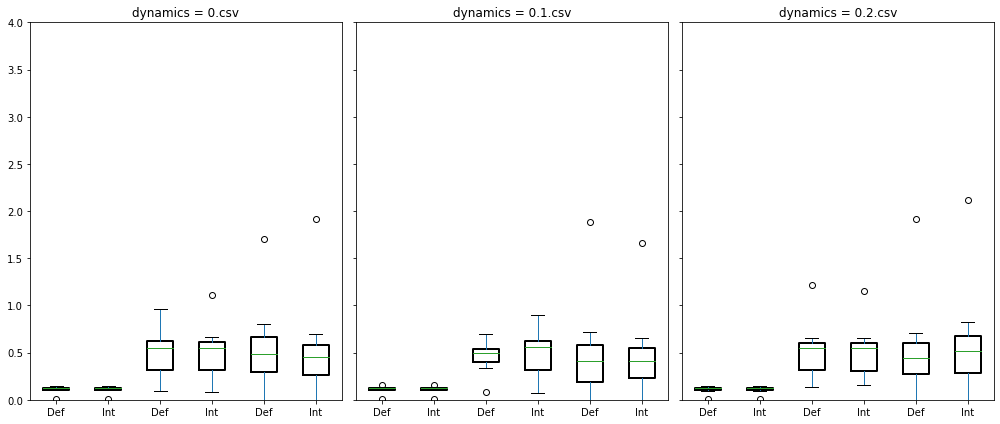

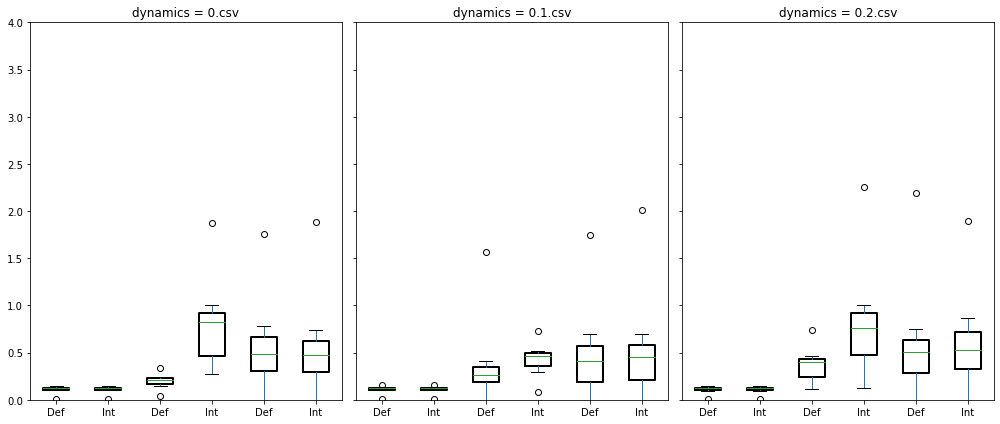

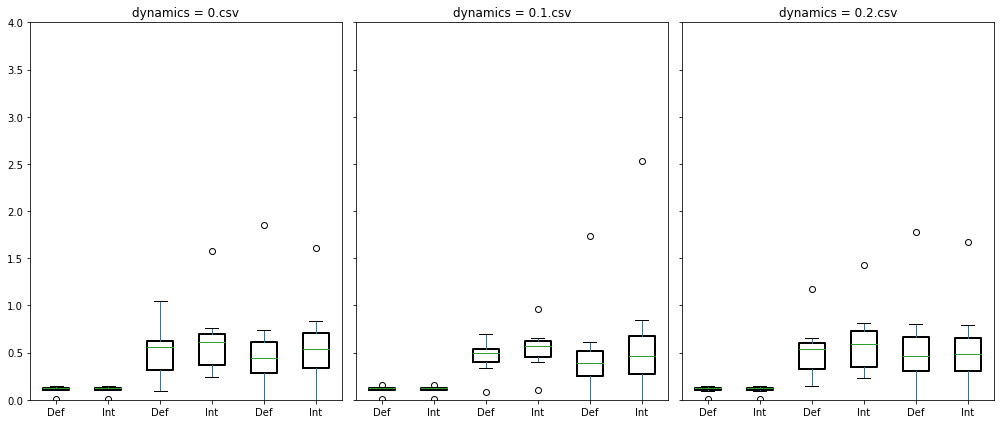

In [38]:
plotGraphCpu(DYNAMICS_SCENARIO,SOAR);
plotGraphCpu(DYNAMICS_SCENARIO,BDI);
plotGraphCpu(DYNAMICS_SCENARIO,BBGP);

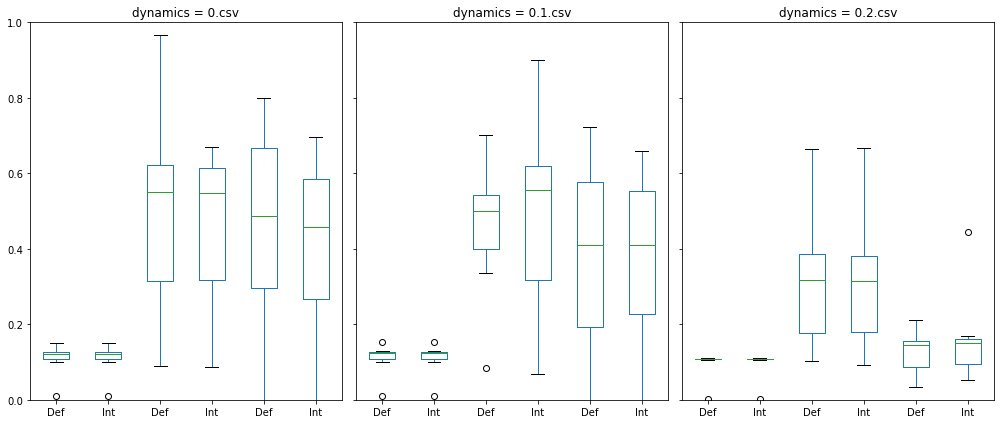

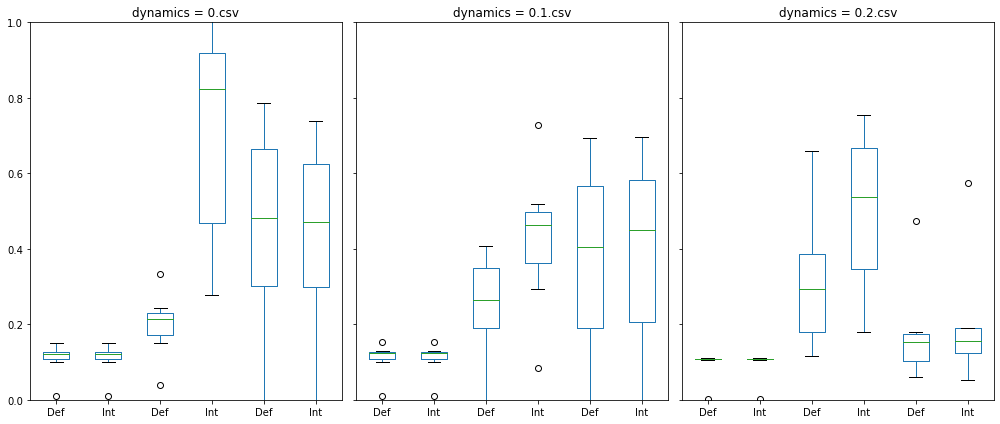

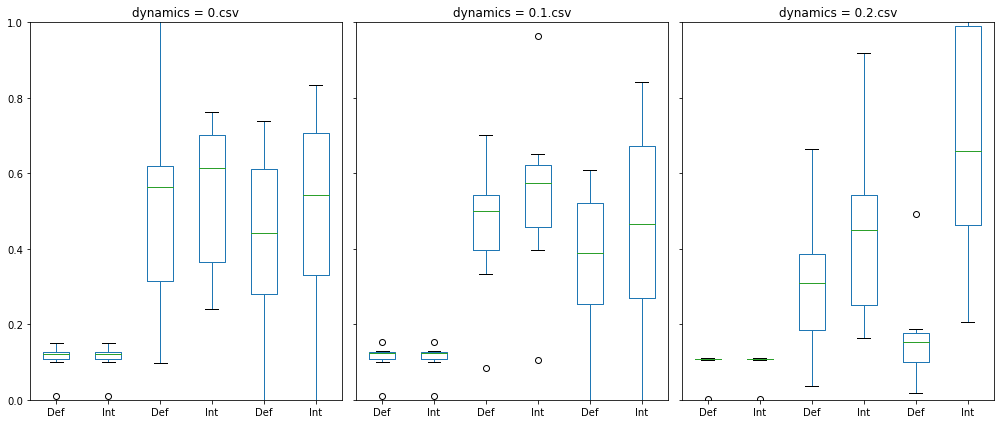

In [46]:
plotGraphMem(DYNAMICS_SCENARIO,SOAR);
plotGraphMem(DYNAMICS_SCENARIO,BDI);
plotGraphMem(DYNAMICS_SCENARIO,BBGP);

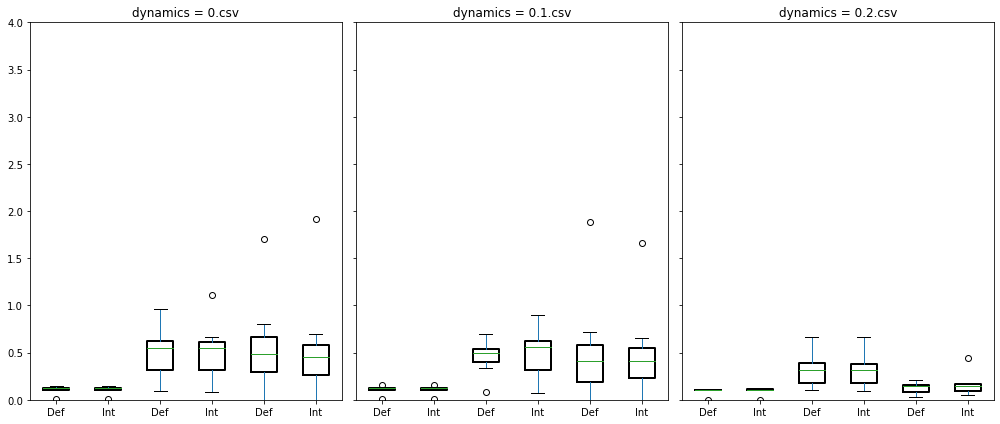

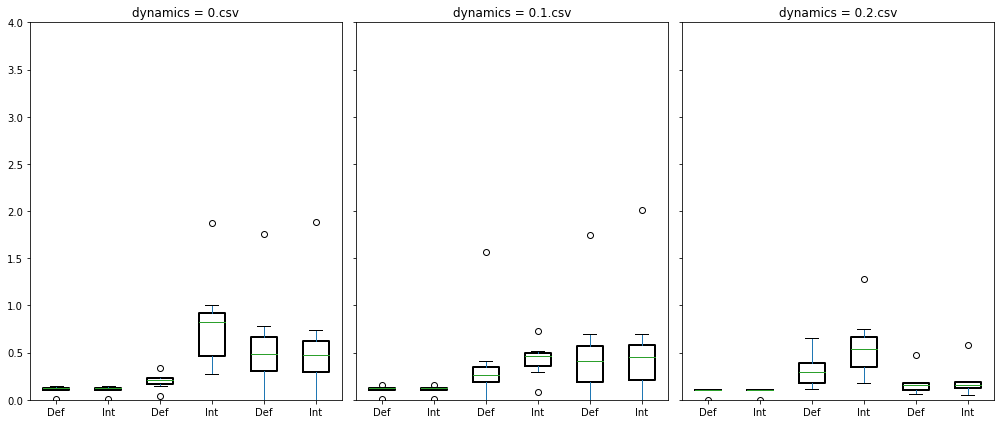

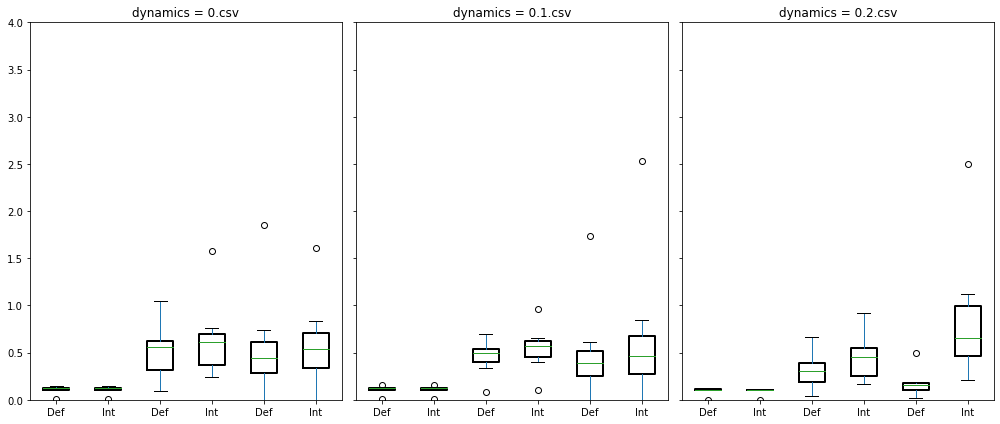

In [43]:
plotGraphCpu(DYNAMICS_SCENARIO,SOAR);
plotGraphCpu(DYNAMICS_SCENARIO,BDI);
plotGraphCpu(DYNAMICS_SCENARIO,BBGP);

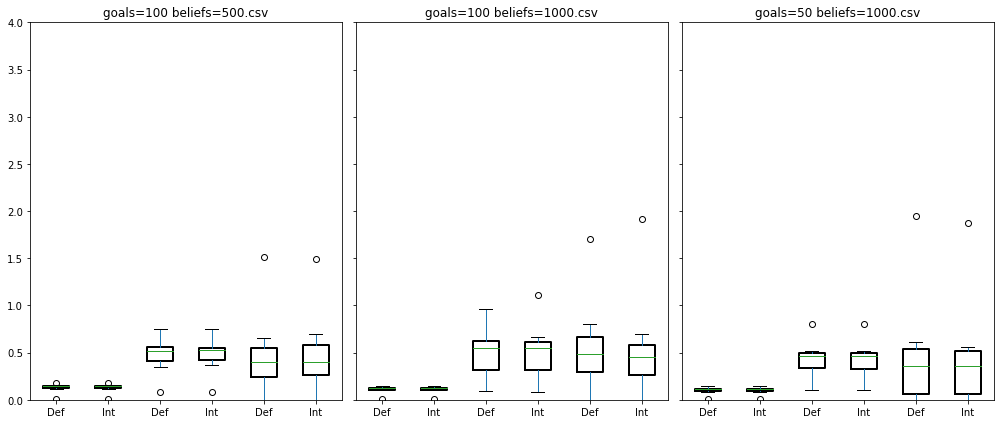

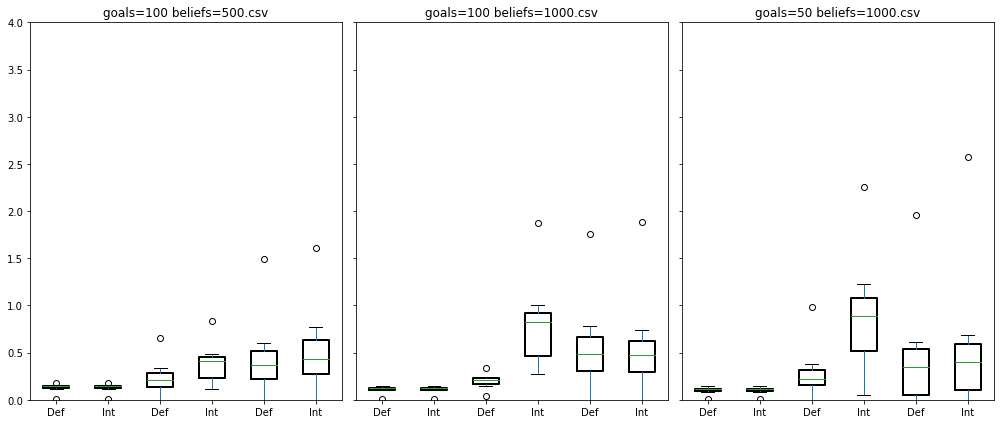

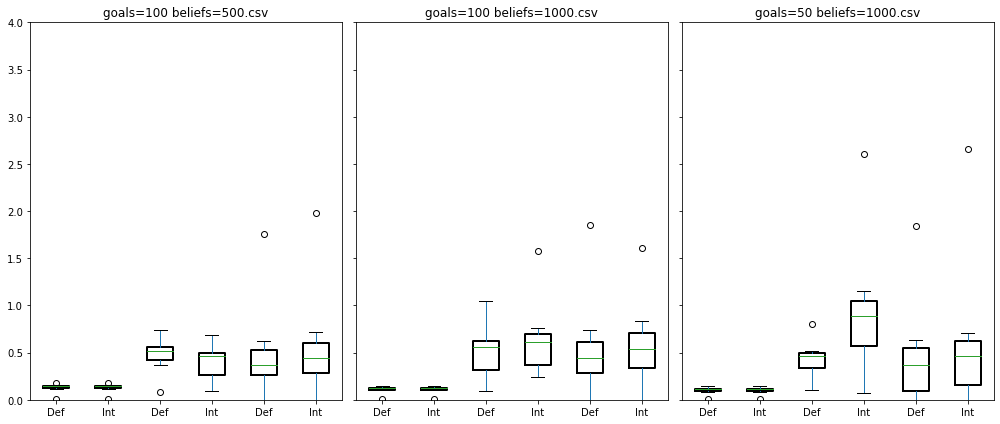

In [34]:
plotGraphCpu(GOALS_BELIEFS_SCENARIO,SOAR);
plotGraphCpu(GOALS_BELIEFS_SCENARIO,BDI);
plotGraphCpu(GOALS_BELIEFS_SCENARIO,BBGP);

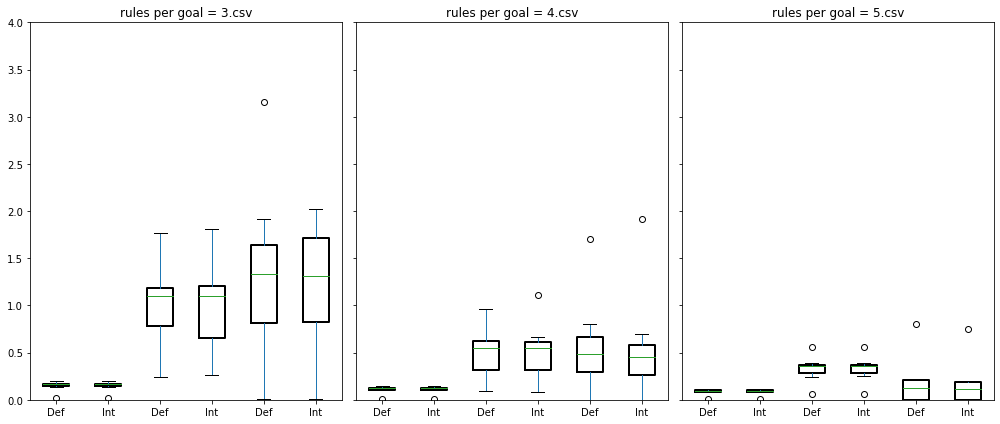

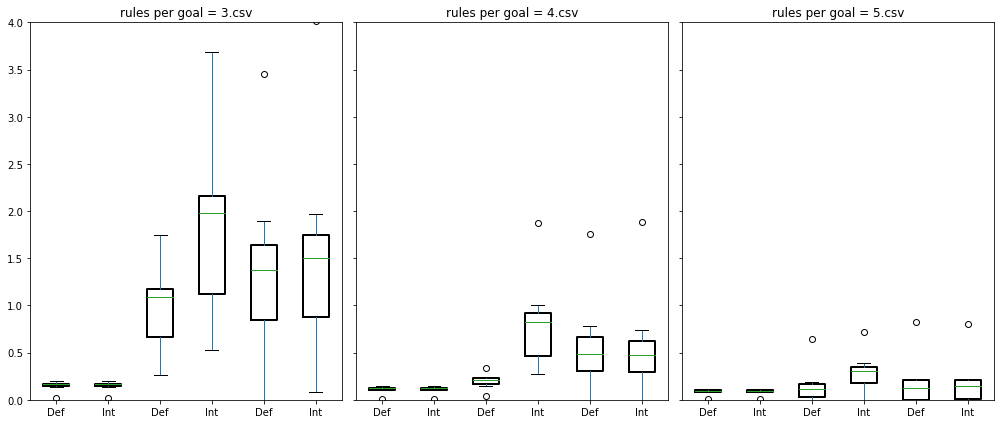

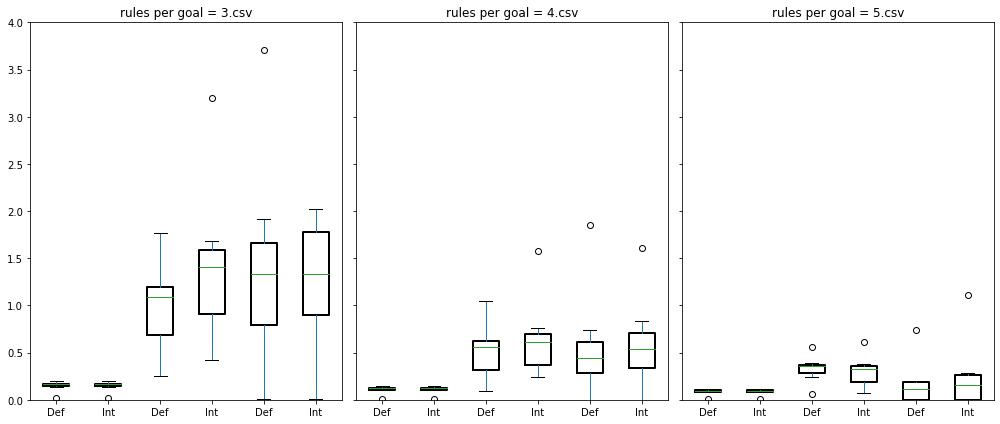

In [25]:
plotGraphCpu(RULES_SCENARIO,SOAR);
plotGraphCpu(RULES_SCENARIO,BDI);
plotGraphCpu(RULES_SCENARIO,BBGP);

In [40]:
valores = pd.read_csv(DYNAMICS_SCENARIO[2] , sep =";", decimal =",")
dist1 = select(memoryStrategies[FORGETTING] , engines[BBGP], relevanceModels[0] , valores)[efficiencyProperties[CPU]]
dist1 = np.nan_to_num(dist1)
dist2 = select(memoryStrategies[FORGETTING] , engines[BBGP], relevanceModels[3] , valores)[efficiencyProperties[CPU]]
dist2 = np.nan_to_num(dist1)

#memoryStrategies = [ "DEFAULT" , "STORING_RETRIEVING"  , "FORGETTING"];
#engines = ["SOAREngine" , "BDIEngine" , "BBGPEngine"];
#relevanceModels = ["DefaultRelevanceModel" , 
#                   "SOARIntegratedRelevanceModel",
#                   "BDIIntegratedRelevanceModel" ,
#                  "BBGPIntegratedRelevanceModel" ];

#alternativeModels = ["SOARAlternativeRelevanceModel",
#                   "BDIAlternativeRelevanceModel" ,
#                  "BBGPAlternativeRelevanceModel" ];

from scipy.stats import mannwhitneyu
stat , p = mannwhitneyu(dist1 , dist2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


stat=2048.000, p=0.499
Probably the same distribution


In [18]:
stat , p = mannwhitneyu(dist1 , dist3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


NameError: name 'dist3' is not defined

In [19]:
data = pd.read_csv(sheets[9] , sep =";", decimal =",")
select(memoryStrategy , engine, relevanceModel , data)

tipoDeRaciocinio  tipoDeMemoria         modeloDeRelevancia            
 BBGPEngine        DEFAULT              BBGPAlternativeRelevanceModel      2.798814
                                        BBGPIntegratedRelevanceModel       3.575836
                   FORGETTING           BBGPAlternativeRelevanceModel      0.762856
                                        BBGPIntegratedRelevanceModel      19.016668
                   STORING_RETRIEVING   BBGPAlternativeRelevanceModel     47.524711
                                        BBGPIntegratedRelevanceModel      74.988054
 BDIEngine         DEFAULT              BDIAlternativeRelevanceModel       2.758664
                                        BDIIntegratedRelevanceModel        3.920731
                   FORGETTING           BDIAlternativeRelevanceModel       0.752106
                                        BDIIntegratedRelevanceModel       45.245913
                   STORING_RETRIEVING   BDIAlternativeRelevanceModel      31.728122
     